In [ ]:
# pip install requests
from dotenv import load_dotenv
load_dotenv()
import requests
 
api_key =""
filename = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/page_3.jpg"         # ex: ./image.png
 
url = "https://api.upstage.ai/v1/document-ai/document-parse"
headers = {"Authorization": f"Bearer {api_key}"}
 
files = {"document": open(filename, "rb")}
data = {"ocr": "force", "base64_encoding": "['table']", "model": "document-parse"}
response = requests.post(url, headers=headers, files=files, data=data)
 
print(response.json())

{'api': '2.0', 'content': {'html': '<p id=\'0\' data-category=\'paragraph\' style=\'font-size:16px\'>UJAAS ENERGY LIMITED</p>\n\n<br><p id=\'2\' data-category=\'paragraph\' style=\'font-size:18px\'>(Rs. In Lakhs)</p>\n<br><table id=\'3\' style=\'font-size:14px\'><tr><td></td><td colspan="3">Quarter Ended</td><td colspan="2">Nine Months Ended</td><td>Year Ended</td></tr><tr><td>Particulars ·</td><td>3 Months ended</td><td>Preceding 3 Months ended</td><td>Corresponding 3 months ended in the previous year</td><td>Year to date figures for nine months ended</td><td>Year to date figures for nine months ended</td><td>Year to date for figures twelve months ended</td></tr><tr><td></td><td>31-12-2024</td><td>30-09-2024</td><td>31-12-2023</td><td>31-12-2024</td><td>31-12-2023</td><td>31-03-2024</td></tr><tr><td></td><td>Unaudited</td><td>Unaudited</td><td>Unaudited</td><td>Unaudited</td><td>Unaudited</td><td>Audited</td></tr><tr><td>1. Revenue from operations</td><td>816.84</td><td>470.47</td><td

In [ ]:
from langchain_openai import ChatOpenAI
import os
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(model='gpt-4o')

In [25]:
data = {"Statement_Consolidated_finanacial_results_for_all_months": {
"Quarter ended 31 December 2024": {
    "Revenue from operations": 16175.71,
    "Other income": 1301.15,
    "Total income": 17476.86,
    "Cost of construction and development": 6272.52,
    "Changes in inventories of work-in-progress and finished properties": 1275.2,
    "Employee benefit expense": 2743.89,
    "Finance costs": 874.35,
    "Depreciation and amortisation expenses": 312.6,
    "Other expenses": 3596.12,
    "Total expenses": 12524.2,
    "Profit/loss before tax and share of profit/loss of joint ventures": 4952.66,
    "Share of profit/loss of joint ventures, net": 11.2,
    "Profit/loss before tax": 4941.42,
    "Current tax": 277.46,
    "Deferred tax": 411.9,
    "Profit/loss for the period/year": 4252.06,
    "Other comprehensive income/loss": 473.84,
    "Total comprehensive income/loss for the period/year, net of tax": 4725.9
},
}}

In [40]:
from glob import glob
import sys
import json
folder_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench"
all_file = glob(os.path.join(folder_path,"*.json"))

In [41]:
all_file

['/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench/output4.json',
 '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench/output30.json',
 '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench/output_20.json',
 '/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench/output132.json']

In [ ]:
from glob import glob
import sys
import json
folder_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/upstage_pdf_extractor/dp-bench"
all_file = glob(os.path.join(folder_path,"*.json"))


for file in all_file:
    i = os.path.basename(file).split(".json")[0].split("output")[-1]


    with open(file) as f:
        text = f.read()
        prompt1 = f"""
                
                it has the STANDALONE, CONSOLIDATED, Balance Sheet, and Cash Flow tables data . sometime this statement comes combine please extract properly.
                extract the table from this input text and extracted table should follow this kind of structure 
                give the proper heading to the table so we can understand for which statement it belongs to

                | Particulars                                  | 31-DEC-2024     | 30-SEPT-2024    | 31-DEC-2023     | 31-DEC-2024 (Nine Months) | 31-DEC-2023 (Nine Months) | 31-MAR-2024 (Year Ended) |
                |----------------------------------------------|-----------------|-----------------|-----------------|----------------------------|----------------------------|----------------------------|
                | **Income From Operations**                   |                 |                 |                 |                            |                            |                            |
                | a) Income from Operations                    | 4,463.99        | 4,403.25        | 5,727.44        | 13,948.72                   | 12,647.87                   | 21,260.03                   |
                | b) Other Income                              | 2.47            | 60.90           | 2.11            | 78.03                        | 11.45                        | 511.70                       |
                | **Total Income from Operations**             | 4,466.46        | 4,464.15        | 5,729.55        | 13,578.75                   | 12,659.32                   | 22,271.73                   |
                |                                              |                 |                 |                 |                            |                            |                            |
                | **Expenses**                                 |                 |                 |                 |                            |                            |                            |
                | a) Cost of materials consumed                | 2,100.58        | 2,810.09        | 2,526.36        | 7,266.44                     | 7,365.89                     | 9,992.20                     |
                | b) Purchase of stock-in-trade                | 214.15          | 330.05          | 1,563.06        | 964.71                       | 2,864.59                     | 3,477.84                     |
                | c) Changes in inventories of Finished Goods, WIP | 264.52          | (559.34)        | (282.32)        | (968.95)                     | 73.71                        | 223.20                       |
                | d) Employees benefit expense                 | 263.88          | 254.74          | 523.44          | 839.72                       | 1,809.40                     | 2,062.63                     |
                | e) Finance Costs                             | 63.32           | 108.00          | 179.21          | 307.21                       | 544.22                       | 742.90                       |
                | f) Depreciation and amortisation expense     | 79.55           | 61.51           | 101.38          | 242.47                       | 341.25                       | 457.63                       |
                | g) Job Charges                               | 878.17          | 932.55          | 654.38          | 2,612.83                     | 1,904.65                     | 2,767.18                     |
                | h) Other expenses                            | 465.31          | 497.15          | 615.53          | 1,524.57                     | 1,901.79                     | 2,705.27                     |
                | **Total Expenses**                           | 4,432.47        | 4,434.74        | 5,882.84        | 13,388.55                   | 16,805.48  

                keep continous adding remaining details after that here do not miss any data
                input is 
                :{text}
                """
        extracted_table  =model.invoke(prompt1).content

        prompt2 = f"""convert given table in json structure do it for all dates data for your understanding this is one example {data}\n
        it has the finacial statement for STANDALONE, CONSOLIDATED, Balance Sheet, and Cash Flow
        1.do not miss any data and give the proper formated json structures
        do not give any unnecessary text give the pure json i do not need any other explaination

        Ensure that data is:\n"
        All values are positive.\n"
        Genereate ouput for each datewise "
        if you see the mutiple table  because may be the page break"
        better understanding check given example"
        If a statement is not present, mark it as '<statement_name>_are_not_present'.\n"
        Use precise key names  instead of variations.\n"
        Do not include markdown formatting, newlines, or unnecessary characters.\n"
        Follow the data types (float for numeric values, string for text).\n"
        Ignore extra text that does not belong to the financial statements.\n"
        ensure the give all date detail data"

        Extract standalone and consolidated financial statements accurately.
        Convert the extracted data into structured JSON format.
        handle most scenarios and variations in financial statement formats.
        
        input table is :{extracted_table}
        """
        json_result  =model.invoke(prompt2).content


 
        try:
            result1 = eval(json_result)
            with open(f"{i}_final.json",'w') as f:
                json.dump(result1,f)
        except:
            result2 = json_result
            with open(f"{i}_final.json",'w') as f:
                json.dump(result2,f)







    

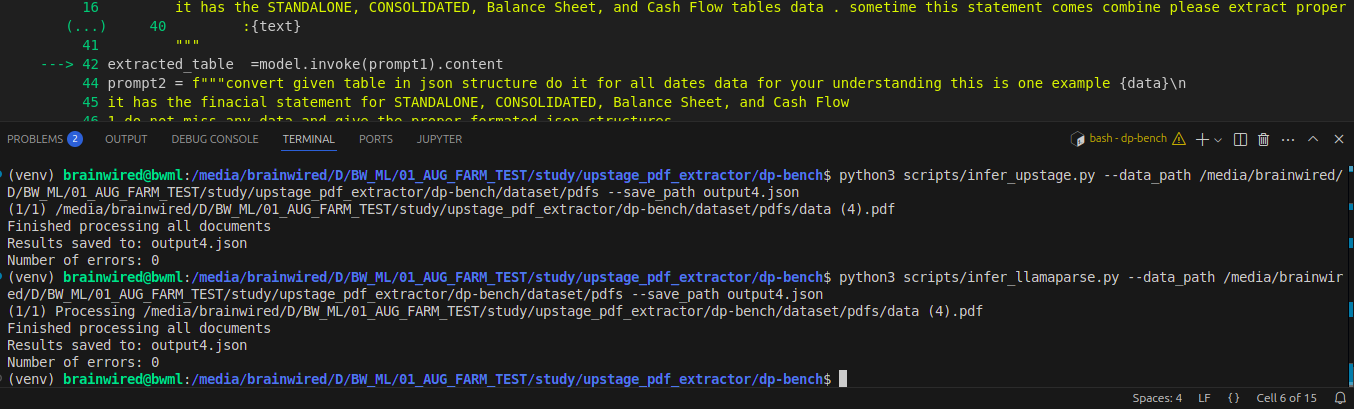

In [9]:
# | Particulars                                  | 31-DEC-2024     | 30-SEPT-2024    | 31-DEC-2023     | 31-DEC-2024 (Nine Months) | 31-DEC-2023 (Nine Months) | 31-MAR-2024 (Year Ended) |
# |----------------------------------------------|-----------------|-----------------|-----------------|----------------------------|----------------------------|----------------------------|
# | **Income From Operations**                   |                 |                 |                 |                            |                            |                            |
# | a) Income from Operations                    | 4,463.99        | 4,403.25        | 5,727.44        | 13,948.72                   | 12,647.87                   | 21,260.03                   |
# | b) Other Income                              | 2.47            | 60.90           | 2.11            | 78.03                        | 11.45                        | 511.70                       |
# | **Total Income from Operations**             | 4,466.46        | 4,464.15        | 5,729.55        | 13,578.75                   | 12,659.32                   | 22,271.73                   |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Expenses**                                 |                 |                 |                 |                            |                            |                            |
# | a) Cost of materials consumed                | 2,100.58        | 2,810.09        | 2,526.36        | 7,266.44                     | 7,365.89                     | 9,992.20                     |
# | b) Purchase of stock-in-trade                | 214.15          | 330.05          | 1,563.06        | 964.71                       | 2,864.59                     | 3,477.84                     |
# | c) Changes in inventories of Finished Goods, WIP | 264.52          | (559.34)        | (282.32)        | (968.95)                     | 73.71                        | 223.20                       |
# | d) Employees benefit expense                 | 263.88          | 254.74          | 523.44          | 839.72                       | 1,809.40                     | 2,062.63                     |
# | e) Finance Costs                             | 63.32           | 108.00          | 179.21          | 307.21                       | 544.22                       | 742.90                       |
# | f) Depreciation and amortisation expense     | 79.55           | 61.51           | 101.38          | 242.47                       | 341.25                       | 457.63                       |
# | g) Job Charges                               | 878.17          | 932.55          | 654.38          | 2,612.83                     | 1,904.65                     | 2,767.18                     |
# | h) Other expenses                            | 465.31          | 497.15          | 615.53          | 1,524.57                     | 1,901.79                     | 2,705.27                     |
# | **Total Expenses**                           | 4,432.47        | 4,434.74        | 5,882.84        | 13,388.55                   | 16,805.48                   | 22,448.84                   |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Profit/(Loss) before tax (1-2)**           | 136.99          | 29.40           | (153.29)        | 188.20                       | (546.16)                     | (177.12)                     |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Tax Expense**                              |                 |                 |                 |                            |                            |                            |
# | Current Tax                                  | 0.00            | 0.00            | 0.00            | 0.00                         | 0.00                         | 0.00                         |
# | Deferred Tax                                 | 36.68           | 4.42            | (53.14)         | 47.87                        | (175.58)                     | (36.22)                      |
# | **Net Profit/(Loss) for the period (3-4)**   | 100.30          | 24.98           | (100.15)        | 140.32                       | (370.58)                     | (140.90)                     |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Other Comprehensive Income:**              |                 |                 |                 |                            |                            |                            |
# | A) Items that will not be reclassified to profit or loss | 0.91            | 0.91            | 2.50            | 2.72                         | 18.72                        | (3.62)                       |
# | B) Income tax relating to items that will not be reclassified to profit or loss | (0.22)          | (0.23)          | (0.63)          | (0.68)                       | (4.71)                       | 0.91                         |
# | B) Items that will be reclassified to profit or loss | 0.00            | 0.00            | 0.00            | 0.00                         | 0.00                         | 0.00                         |
# | **Total Comprehensive Income for the period** | 100.99          | 25.66           | (98.28)         | 142.36                       | (356.58)                     | (143.61)                     |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Paid-up equity share capital (₹10/- each)** | 586.94          | 586.94          | 586.94          | 586.94                       | 586.94                       | 586.94                       |
# | **Other Equity (excluding revaluation reserve)** |                 |                 |                 |                            |                            | 2,550.65                      |
# |                                              |                 |                 |                 |                            |                            |                            |
# | **Earnings per share (₹10/- each, not annualised)** |                 |                 |                 |                            |                            |                            |
# | a) Basic                                     | 1.71            | 0.43            | (1.71)          | 2.39                         | (6.31)                       | (2.40)                       |
# | b) Diluted                                   | 1.71            | 0.43            | (1.71)          | 2.39                         | (6.31)                       | (2.40)                       |


In [10]:
prompt = f"""
extract the table from this input text and extracted table should follw this kind of structure

| Particulars                                  | 31-DEC-2024     | 30-SEPT-2024    | 31-DEC-2023     | 31-DEC-2024 (Nine Months) | 31-DEC-2023 (Nine Months) | 31-MAR-2024 (Year Ended) |
|----------------------------------------------|-----------------|-----------------|-----------------|----------------------------|----------------------------|----------------------------|
| **Income From Operations**                   |                 |                 |                 |                            |                            |                            |
| a) Income from Operations                    | 4,463.99        | 4,403.25        | 5,727.44        | 13,948.72                   | 12,647.87                   | 21,260.03                   |
| b) Other Income                              | 2.47            | 60.90           | 2.11            | 78.03                        | 11.45                        | 511.70                       |
| **Total Income from Operations**             | 4,466.46        | 4,464.15        | 5,729.55        | 13,578.75                   | 12,659.32                   | 22,271.73                   |
|                                              |                 |                 |                 |                            |                            |                            |
| **Expenses**                                 |                 |                 |                 |                            |                            |                            |
| a) Cost of materials consumed                | 2,100.58        | 2,810.09        | 2,526.36        | 7,266.44                     | 7,365.89                     | 9,992.20                     |
| b) Purchase of stock-in-trade                | 214.15          | 330.05          | 1,563.06        | 964.71                       | 2,864.59                     | 3,477.84                     |
| c) Changes in inventories of Finished Goods, WIP | 264.52          | (559.34)        | (282.32)        | (968.95)                     | 73.71                        | 223.20                       |
| d) Employees benefit expense                 | 263.88          | 254.74          | 523.44          | 839.72                       | 1,809.40                     | 2,062.63                     |
| e) Finance Costs                             | 63.32           | 108.00          | 179.21          | 307.21                       | 544.22                       | 742.90                       |
| f) Depreciation and amortisation expense     | 79.55           | 61.51           | 101.38          | 242.47                       | 341.25                       | 457.63                       |
| g) Job Charges                               | 878.17          | 932.55          | 654.38          | 2,612.83                     | 1,904.65                     | 2,767.18                     |
| h) Other expenses                            | 465.31          | 497.15          | 615.53          | 1,524.57                     | 1,901.79                     | 2,705.27                     |
| **Total Expenses**                           | 4,432.47        | 4,434.74        | 5,882.84        | 13,388.55                   | 16,805.48  

keep continous adding remaining details after that here do not miss any data
input is 
:{text}
"""



In [11]:
result  =model.invoke(prompt).content

In [12]:
with open("table20.txt",'w') as f:
    f.write(result)

In [ ]:

with open("table20.txt",'w') as f:
    f.write(result)
    
    data = {"Statement_Consolidated_finanacial_results_for_all_months": {
        "Quarter ended 31 December 2024": {
            "Revenue from operations": 16175.71,
            "Other income": 1301.15,
            "Total income": 17476.86,
            "Cost of construction and development": 6272.52,
            "Changes in inventories of work-in-progress and finished properties": 1275.2,
            "Employee benefit expense": 2743.89,
            "Finance costs": 874.35,
            "Depreciation and amortisation expenses": 312.6,
            "Other expenses": 3596.12,
            "Total expenses": 12524.2,
            "Profit/loss before tax and share of profit/loss of joint ventures": 4952.66,
            "Share of profit/loss of joint ventures, net": 11.2,
            "Profit/loss before tax": 4941.42,
            "Current tax": 277.46,
            "Deferred tax": 411.9,
            "Profit/loss for the period/year": 4252.06,
            "Other comprehensive income/loss": 473.84,
            "Total comprehensive income/loss for the period/year, net of tax": 4725.9
        },
}}
    

In [ ]:
prompt = f"""
convert given table in json structure do it for all dates data for your understanding this is one example {data}\n
it has the finacial statement for STANDALONE, CONSOLIDATED, Balance Sheet, and Cash Flow
1.do not miss any data and give the proper formated json structures

Ensure that data is:\n"
All values are positive.\n"
Genereate ouput for each datewise "
if you see the mutiple table  because may be the page break"
better understanding check given example"
If a statement is not present, mark it as '<statement_name>_are_not_present'.\n"
Use precise key names like 'Employee benefit expense' instead of variations.\n"
Do not include markdown formatting, newlines, or unnecessary characters.\n"
Follow the data types (float for numeric values, string for text).\n"
Ignore extra text that does not belong to the financial statements.\n"
ensure the give all date detail data"
do not give any unnecessary text

input table may consist of the standalone
input table is :{result}


"""




import json
json_result  =model.invoke(prompt).content
try:
    result1 = eval(json_result)
    with open(f"{i}1.json",'w') as f:
        json.dump(result1,f)
except:
    result2 = json_result
    with open(f"{i}1.json",'w') as f:
        json.dump(result2,f)

In [26]:
json_result

'Here is the JSON structure for the provided financial data, following the specified format and ensuring that all values are positive:\n\n```json\n{\n  "Statement_Standalone_finanacial_results_for_all_months": {\n    "Quarter ended 31 December 2024": {\n      "Income from Operations": 4483.89,\n      "Other Income": 2.47,\n      "Total Income from Operations": 4486.46,\n      "Cost of materials consumed": 2100.58,\n      "Purchase of stock-in-trade": 214.15,\n      "Changes in inventories of Finished Goods, WIP": 264.52,\n      "Employee benefits expense": 263.88,\n      "Finance Costs": 63.32,\n      "Depreciation and amortisation expense": 79.85,\n      "Job Charges": 678.17,\n      "Other expenses": 466.31,\n      "Total Expenses": 4330.47,\n      "Profit/Loss Before Tax": 155.99,\n      "Current Tax": 0.0,\n      "Deferred Tax": 55.68,\n      "Net Profit/Loss for the period": 100.30,\n      "Other Comprehensive Income": {\n        "Items that will not be reclassified to profit or l

In [ ]:
import json

with open("test.json") as